<a href="https://colab.research.google.com/github/sethkipsangmutuba/Distributed-Computing-Application/blob/main/Note6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2 Distributed Computing Models

**Seth Kipsang**

---

## Learning Objectives

By the end of this lecture, students should be able to:

- Understand the foundational concepts of distributed computing systems.  
- Identify and differentiate classical distributed computing models.  
- Analyze the workstation model, its operation, and associated challenges.  
- Examine the relevance of workstation-based distributed systems in modern telecommunication and information networks.  

---

## 1.2 Distributed Computing Models: Conceptual Overview

A **distributed computing system** is defined as a network of autonomous computers, each equipped with its own local memory and peripherals, that coordinate through explicit **message-passing mechanisms**.

Distributed computing models formalize:
- How nodes are organized  
- How computation is allocated  
- How resources are shared  

They provide a framework for designing systems that are:

- **Scalable** – able to handle increasing numbers of nodes or tasks  
- **Fault-tolerant** – resilient to individual node failures  
- **Efficient** – maximizing utilization of available computational resources  

### Common Distributed Computing Models

- **Workstation Model**  
- **Workstation–Server Model**  
- **Processor-Pool Model**  



---

## 1.2.1 Workstation Model

### Architecture

The workstation model consists of:

- **Personal computers (diskful workstations):**  
  Each node has its own hard disk and local file system.
- **Network connectivity:**  
  Typically a high-speed LAN (e.g., 100 Mbps or higher).
- **Autonomy:**  
  Each workstation can operate as a standalone, single-user system.

This model is well-suited for:

- **Educational departments:**  
  Laboratories or offices with PCs dispersed across a campus.
- **Corporate offices:**  
  Individual workstations scattered across buildings or floors.

Users maintain a *home workstation*, but distributed computing allows **idle workstations** to be leveraged for computation, improving overall system performance and resource utilization.

---

### Operational Dynamics

1. Users log in to their **home workstation** and submit computational jobs.  
2. The distributed system identifies **idle workstations** across the network.  
3. If the home workstation lacks sufficient resources:
   - The job is transferred to an idle node  
   - Executed remotely  
   - Results are returned to the home workstation  
4. The entire process is **transparent to the user**.

---

  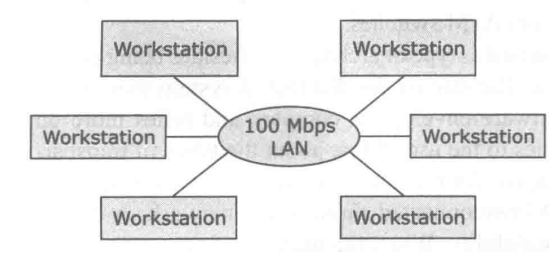      Workstation
           |
Workstation—LAN—Workstation
           |
        Workstation




## Key Points

- After working hours, many workstations remain **underutilized**; connecting them in a distributed system reduces wasted computational potential.
- Jobs can be **partitioned across idle workstations**, increasing throughput and reducing execution time.

---

## Implementation Challenges

While conceptually elegant, the workstation model poses several implementation challenges  
*(Tanenbaum, 1995)*:

### Detection of Idle Workstations
- Efficient mechanisms are required to identify available nodes  
- Must not interfere with local user activity

### Transparent Process Transfer
- Processes must migrate between nodes  
- Execution correctness and user experience must be preserved

### Resource Conflicts

If a local user logs in to a workstation executing a remote process, three strategies are possible:

- **Shared Execution**  
  - Remote and local processes share resources  
  - May slow down the local process

- **Terminate Remote Process**  
  - Wastes prior computation  
  - May leave the file system in an inconsistent state

- **Process Migration Back to Home Node**  
  - Execution continues  
  - Migration is computationally expensive and resource-intensive

These challenges highlight key research areas in distributed systems:
- Load balancing  
- Process migration efficiency  
- Fault-tolerant execution  

---

## Canonical Implementations

- **Sprite Operating System** *(Ousterhout et al., 1988)*  
  - Supported transparent process migration and load balancing across workstations

- **Xerox PARC Experimental System** *(Shoch & Hupp, 1982)*  
  - Demonstrated early practical applications of distributed computing using idle workstations

---

## Telecommunication & Information Engineering Context

- **Edge Computing Analogy**  
  Idle workstations resemble edge nodes in modern networks, capable of offloading tasks from central servers.

- **IoT Networks**  
  Similar to distributed sensors, idle nodes can execute local computations, reducing network load.

- **Energy Efficiency**  
  Utilization of idle nodes reduces wasted energy, supporting *green ICT* initiatives.

- **High-Performance Networking**  
  Transparent job migration principles inform task scheduling and resource allocation in distributed telecom networks.

---

## Key Takeaways

- The workstation model is an **archetypal loosely coupled distributed system**.
- **Primary benefits:**
  - Efficient use of idle resources  
  - Transparency  
  - Scalability
- **Main challenges:**
  - Load balancing  
  - Process migration  
  - Local resource conflicts
- **Ongoing relevance:**
  - Edge computing  
  - IoT networks  
  - Distributed cloud services


## Brief on code below*

The execution trace illustrates the core dynamics and trade-offs of the **workstation model**:

- The scheduler successfully exploits idle workstations *(4, 5, 1, 2, 3)* to distribute jobs, demonstrating effective **load sharing across the LAN**.

### Local User Interference: An Inevitable Reality

- **Workstation 5 — SHARE strategy**  
  Job 2 completes successfully, but with **degraded performance**, highlighting the cost of resource contention.

- **Workstation 2 — MIGRATE strategy**  
  Job 4 is moved back to its home node, preserving **execution correctness**, but incurring **migration overhead**.

- **Workstation 1 — TERMINATE strategy**  
  Job 4 is terminated, resulting in **wasted computation**, illustrating the worst-case inefficiency emphasized in classical literature *(e.g., Tanenbaum)*.

### Conflict-Free Execution

- Jobs without interference *(Jobs 1, 3, 5, 6, 7)* complete efficiently, underscoring the **performance benefits** when idle nodes remain undisturbed.

---

### Synthesis

The execution trace validates the **strength of the workstation model** in exploiting idle computational resources. At the same time, it exposes its fundamental weakness: **unpredictability caused by autonomous local users**.

This challenge directly motivates modern research and practice in:
- Edge scheduling  
- Preemption policies  
- Migration-cost-aware algorithms  

These concepts are now central to **telecommunication and distributed networked systems**.


In [5]:
import threading
import time
import random
from queue import Queue, Empty

# -------------------------------
# Job Definition
# -------------------------------

class Job:
    def __init__(self, job_id, workload, home_node):
        self.job_id = job_id
        self.workload = workload  # simulated computation time
        self.home_node = home_node

    def execute(self, node_id):
        print(f"[Job {self.job_id}] Executing on Workstation {node_id}")
        time.sleep(self.workload)
        print(f"[Job {self.job_id}] Completed on Workstation {node_id}")


# -------------------------------
# Workstation Node
# -------------------------------

class Workstation(threading.Thread):
    def __init__(self, node_id):
        super().__init__(daemon=True)
        self.node_id = node_id
        self.job_queue = Queue()
        self.idle = True
        self.local_user_active = False
        self.running = True

    def run(self):
        while self.running:
            try:
                job = self.job_queue.get(timeout=1)
                self.idle = False

                # Simulate local user returning randomly
                if random.random() < 0.3:
                    self.local_user_active = True
                    self.handle_resource_conflict(job)
                else:
                    job.execute(self.node_id)

                self.local_user_active = False
                self.idle = True

            except Empty:
                self.idle = True

    def handle_resource_conflict(self, job):
        strategy = random.choice(["SHARE", "TERMINATE", "MIGRATE"])
        print(f"[Workstation {self.node_id}] Local user returned. Strategy: {strategy}")

        if strategy == "SHARE":
            print(f"[Workstation {self.node_id}] Sharing resources...")
            time.sleep(job.workload * 1.5)
            print(f"[Job {job.job_id}] Completed with degraded performance")

        elif strategy == "TERMINATE":
            print(f"[Job {job.job_id}] Terminated. Computation wasted.")

        elif strategy == "MIGRATE":
            print(f"[Job {job.job_id}] Migrating back to home node {job.home_node.node_id}")
            job.home_node.job_queue.put(job)

    def submit_job(self, job):
        self.job_queue.put(job)

    def is_idle(self):
        return self.idle and not self.local_user_active


# -------------------------------
# Scheduler (LAN Coordinator)
# -------------------------------

class Scheduler:
    def __init__(self, workstations):
        self.workstations = workstations

    def find_idle_node(self):
        idle_nodes = [ws for ws in self.workstations if ws.is_idle()]
        return random.choice(idle_nodes) if idle_nodes else None

    def submit_job(self, job):
        idle_node = self.find_idle_node()
        if idle_node:
            print(f"[Scheduler] Assigning Job {job.job_id} to Workstation {idle_node.node_id}")
            idle_node.submit_job(job)
        else:
            print(f"[Scheduler] No idle nodes. Executing on home workstation {job.home_node.node_id}")
            job.home_node.submit_job(job)


# -------------------------------
# Simulation Setup
# -------------------------------

def simulate_workstation_model():
    # Create workstations
    workstations = [Workstation(i) for i in range(1, 6)]

    for ws in workstations:
        ws.start()

    scheduler = Scheduler(workstations)

    home_node = workstations[0]

    # Submit jobs
    for i in range(1, 8):
        job = Job(job_id=i, workload=random.uniform(1, 3), home_node=home_node)
        scheduler.submit_job(job)
        time.sleep(0.5)

    time.sleep(15)


if __name__ == "__main__":
    simulate_workstation_model()


[Scheduler] Assigning Job 1 to Workstation 2
[Job 1] Executing on Workstation 2
[Scheduler] Assigning Job 2 to Workstation 1
[Job 2] Executing on Workstation 1
[Scheduler] Assigning Job 3 to Workstation 3
[Workstation 3] Local user returned. Strategy: SHARE
[Workstation 3] Sharing resources...
[Scheduler] Assigning Job 4 to Workstation 4
[Job 4] Executing on Workstation 4
[Job 1] Completed on Workstation 2
[Scheduler] Assigning Job 5 to Workstation 5
[Job 5] Executing on Workstation 5
[Scheduler] Assigning Job 6 to Workstation 2
[Job 6] Executing on Workstation 2
[Job 2] Completed on Workstation 1
[Scheduler] Assigning Job 7 to Workstation 1
[Job 7] Executing on Workstation 1
[Job 4] Completed on Workstation 4
[Job 5] Completed on Workstation 5
[Job 3] Completed with degraded performance
[Job 6] Completed on Workstation 2
[Job 7] Completed on Workstation 1


# 1.2.2 Workstation–Server Model

---

## Learning Objectives

By the end of this section, students will be able to:

- Define the **workstation–server model** and distinguish it from the classical workstation model.
- Analyze the **architecture**, **resource allocation**, and **operational principles** of workstation–server systems.
- Evaluate **scalability**, **fault tolerance**, and **performance characteristics** in multi-server distributed systems.
- Relate the workstation–server model to **modern telecommunication and cloud architectures**.
- Identify research challenges related to **server replication**, **resource contention**, and **service abstraction**.

---

## Conceptual Overview

The **workstation–server model** is a distributed system architecture in which:

- Workstations do **not necessarily possess local storage** (*diskless workstations*).
- High-speed **networked servers** maintain the file systems, databases, and software required by workstations.
- The architecture explicitly separates:
  - **Compute nodes** → workstations  
  - **Storage and service nodes** → servers  

Diskless workstations are **less expensive to deploy**, and with advances in network speed and reliability, they have become practically viable for **large-scale distributed computing environments**.

---

## Architecture and Operation

- Multiple workstations are connected to **one or more high-performance servers** over a high-speed LAN  
  *(e.g., 100 Gbps in modern deployments)*.

### Server-Provided Services

Servers provide critical shared services, including:

- **File Storage**  
  *(File servers)*

- **Web Services**  
  *(HTTP servers)*

- **Computation and Scheduling**  
  *(Cycle servers)*

---
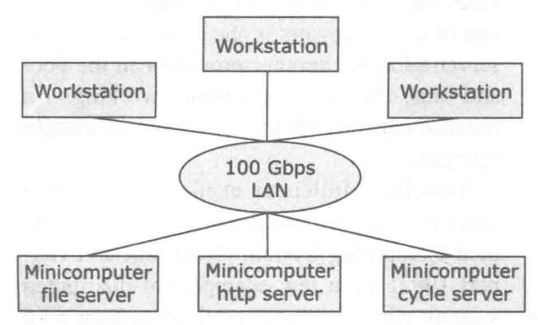

## Key Characteristics

- **Centralization of expensive resources**  
  High-cost resources (e.g., graphical workstations, database servers) are centralized, while multiple inexpensive workstations handle user interaction and routine computation.

- **Server-managed system operations**  
  Server processes manage resource allocation, file system consistency, and service requests.

---

## Advantages

### Scalability
- Adding workstations or servers does not disrupt the overall system.
- Servers can be **replicated** to balance load across the network.

### Reliability and Fault Tolerance
- **Redundant servers** allow continued operation if a server fails.
- Centralized server management ensures **consistent and secure file storage**.

### Service Abstraction
- Servers are physical entities but appear as **abstract services** to clients.
- Specialized servers can provide distinct functions, such as:
  - Database management  
  - Computation offloading  
  - Graphical rendering  

### User Flexibility
- A **common file system** allows users to log into any workstation and continue working seamlessly.
- Temporary files may reside locally, while critical data is stored centrally, improving **data integrity and maintainability**.

---

## Canonical Implementation

### V-System *(Cheriton, 1988)*

- A distributed computing system based on the **workstation–server model**.
- Demonstrates centralized server management with seamless access from **diskless workstations**.
- Provides improved service quality and reliability compared to purely workstation-based systems.

---

## Telecommunication & Information Engineering Context

### Modern Cloud and Edge Computing
- **Servers** ≈ cloud or edge nodes providing computation, storage, or service orchestration.
- **Workstations** ≈ lightweight client devices or IoT gateways.

### Network Function Virtualization (NFV)
- High-end servers host **virtualized network functions**.
- Low-cost devices operate as access or aggregation points.

### High-Performance Content Delivery
- File servers centralize critical data for multiple users.
- Enables fast retrieval across distributed access points.

### Scalable IoT Infrastructure
- Diskless edge devices (sensors or microcontrollers) rely on central servers for:
  - Analytics  
  - Storage  
- Reduces local hardware requirements and system cost.


## Research Challenges

### Server Replication and Load Balancing
- Optimizing server replication to improve **fault tolerance** while minimizing **network congestion**.

### Resource Contention
- Simultaneous service requests from multiple workstations can create **server-side bottlenecks**.

### Service Abstraction and Transparency
- Ensuring remote servers appear **seamless to client workstations**, with minimal perceived latency or failure.

### Security and Reliability
- Centralized servers represent **critical points of vulnerability**.
- Robust mechanisms are required to ensure:
  - Secure access  
  - Data integrity  
  - High availability  

---

## Key Takeaways

- The **workstation–server model** decouples user workstations from storage and service nodes, enabling efficient resource utilization.
- Centralized, high-performance servers provide:
  - Scalability  
  - Reliability  
  - Sophisticated services  
- **Diskless workstations** reduce hardware costs while leveraging networked servers for storage and computation.
- The model forms a foundational architecture for:
  - Modern cloud computing  
  - Edge computing  
  - IoT systems  



## Brief on the code*

The execution trace demonstrates the **workstation–server model** in operation:

- Each workstation behaves as a **diskless client**, immediately issuing file, web, and compute requests to remote servers rather than executing or storing resources locally.

- **Service abstraction** is evident: workstations are unaware of server identities or physical locations; they simply request services *(FILE, HTTP, CYCLE)*, reinforcing transparency.

### Scalability via Server Replication

- **File services** are split between *FileServer 1* and *FileServer 2*, reducing contention and improving throughput.
- **Compute workloads** are distributed across *CycleServer 1* and *CycleServer 2*, enabling parallel execution.

### Bottlenecks and Contention

- The **HTTP server** becomes a performance bottleneck, as all web requests are serialized through a single server.
- This behavior illustrates a classic research challenge in **centralized service architectures**.

### Consistency and Correctness

- Server-side queues naturally enforce **mutual exclusion and consistency**, ensuring correct service delivery under concurrent access.
- The system preserves **user flexibility and continuity**: multiple workstations access the same logical files and services without conflicts or data inconsistency.

---

### Synthesis

The trace validates the workstation–server model’s core strengths:
- Scalability  
- Centralized management  
- Service transparency  

At the same time, it exposes a fundamental limitation: **hot-spot formation at heavily utilized servers**. This directly motivates modern solutions such as:
- Server replication  
- Load-aware scheduling  
- Edge offloading  

These mechanisms are now central to **telecommunication, cloud, and distributed systems engineering**.


In [6]:
import threading
import time
import random
from queue import Queue, Empty

# -------------------------------
# Abstract Server
# -------------------------------

class Server(threading.Thread):
    def __init__(self, server_id, service_type):
        super().__init__(daemon=True)
        self.server_id = server_id
        self.service_type = service_type
        self.request_queue = Queue()
        self.running = True

    def run(self):
        while self.running:
            try:
                request = self.request_queue.get(timeout=1)
                self.handle_request(request)
            except Empty:
                pass

    def handle_request(self, request):
        raise NotImplementedError


# -------------------------------
# File Server
# -------------------------------

class FileServer(Server):
    def __init__(self, server_id):
        super().__init__(server_id, "FILE")

    def handle_request(self, request):
        workstation_id, filename = request
        print(f"[FileServer {self.server_id}] Serving file '{filename}' to Workstation {workstation_id}")
        time.sleep(random.uniform(0.5, 1.5))
        print(f"[FileServer {self.server_id}] Completed file transfer to Workstation {workstation_id}")


# -------------------------------
# HTTP Server
# -------------------------------

class HTTPServer(Server):
    def __init__(self, server_id):
        super().__init__(server_id, "HTTP")

    def handle_request(self, request):
        workstation_id, url = request
        print(f"[HTTPServer {self.server_id}] Handling request '{url}' for Workstation {workstation_id}")
        time.sleep(random.uniform(0.3, 1.0))
        print(f"[HTTPServer {self.server_id}] Response sent to Workstation {workstation_id}")


# -------------------------------
# Cycle (Compute) Server
# -------------------------------

class CycleServer(Server):
    def __init__(self, server_id):
        super().__init__(server_id, "CYCLE")

    def handle_request(self, request):
        workstation_id, workload = request
        print(f"[CycleServer {self.server_id}] Executing workload for Workstation {workstation_id}")
        time.sleep(workload)
        print(f"[CycleServer {self.server_id}] Computation completed for Workstation {workstation_id}")


# -------------------------------
# Service Directory (Abstraction)
# -------------------------------

class ServiceDirectory:
    def __init__(self):
        self.services = {"FILE": [], "HTTP": [], "CYCLE": []}

    def register(self, server):
        self.services[server.service_type].append(server)

    def get_server(self, service_type):
        return random.choice(self.services[service_type])


# -------------------------------
# Diskless Workstation (Client)
# -------------------------------

class WorkstationClient(threading.Thread):
    def __init__(self, workstation_id, directory):
        super().__init__(daemon=True)
        self.workstation_id = workstation_id
        self.directory = directory

    def run(self):
        # Simulated user activity
        self.request_file("thesis.pdf")
        self.request_http("https://example.com")
        self.request_compute(random.uniform(1, 3))

    def request_file(self, filename):
        server = self.directory.get_server("FILE")
        print(f"[Workstation {self.workstation_id}] Requesting file '{filename}'")
        server.request_queue.put((self.workstation_id, filename))

    def request_http(self, url):
        server = self.directory.get_server("HTTP")
        print(f"[Workstation {self.workstation_id}] Requesting URL '{url}'")
        server.request_queue.put((self.workstation_id, url))

    def request_compute(self, workload):
        server = self.directory.get_server("CYCLE")
        print(f"[Workstation {self.workstation_id}] Requesting computation ({workload:.2f}s)")
        server.request_queue.put((self.workstation_id, workload))


# -------------------------------
# Simulation Setup
# -------------------------------

def simulate_workstation_server_model():
    directory = ServiceDirectory()

    # Create servers (replication)
    servers = [
        FileServer(1), FileServer(2),
        HTTPServer(1),
        CycleServer(1), CycleServer(2)
    ]

    for server in servers:
        directory.register(server)
        server.start()

    # Create diskless workstations
    workstations = [WorkstationClient(i, directory) for i in range(1, 6)]

    for ws in workstations:
        ws.start()

    time.sleep(15)


if __name__ == "__main__":
    simulate_workstation_server_model()


[Workstation 1] Requesting file 'thesis.pdf'
[Workstation 1] Requesting URL 'https://example.com'
[Workstation 1] Requesting computation (2.79s)
[Workstation 2] Requesting file 'thesis.pdf'
[Workstation 2] Requesting URL 'https://example.com'
[Workstation 2] Requesting computation (1.70s)
[FileServer 1] Serving file 'thesis.pdf' to Workstation 1
[HTTPServer 1] Handling request 'https://example.com' for Workstation 1
[CycleServer 2] Executing workload for Workstation 1
[CycleServer 1] Executing workload for Workstation 2
[Workstation 3] Requesting file 'thesis.pdf'
[Workstation 3] Requesting URL 'https://example.com'
[Workstation 3] Requesting computation (2.90s)
[Workstation 4] Requesting file 'thesis.pdf'
[Workstation 4] Requesting URL 'https://example.com'
[Workstation 4] Requesting computation (1.03s)
[FileServer 2] Serving file 'thesis.pdf' to Workstation 3
[Workstation 5] Requesting file 'thesis.pdf'
[Workstation 5] Requesting URL 'https://example.com'
[Workstation 5] Requesting c

# 1.2.3 Processor-Pool Model

---

## Learning Objectives

By the end of this section, students will be able to:

- Define the **processor-pool model** and explain its operational principles.
- Analyze the **architecture of processor pools** and their interaction with workstations or terminals.
- Understand **job scheduling**, **resource allocation**, and **fault tolerance** in processor-pool systems.
- Compare the processor-pool model with **workstation** and **workstation–server models** in terms of scalability, flexibility, and performance.
- Explore research applications of processor-pool models in **high-performance computing**, telecom networks, and distributed applications.

---

## Conceptual Overview

The **processor-pool model** is a distributed system architecture characterized by:

- A pool of **powerful processors** (microcomputers or minicomputers) providing computation and storage services.
- Heterogeneous processors: some may act as **file servers** or **specialized computation nodes**.
- Terminals or workstations connect to the processor pool via a **high-speed network**, but the processors themselves **do not have direct terminal connections**.
- **No concept of a home workstation**: the **Run Server** dynamically assigns resources to user jobs, unlike the workstation or workstation–server models.

---

## Architecture and Operation

- **Terminals (T1, T2, …, TN)**: diskless workstations or specialized terminals (e.g., graphics terminals).  
- **Users** submit computational jobs through their terminal.  
- **Run Server (RS)** manages:
  - Job scheduling  
  - Processor allocation  

### Job Scheduling Example

1. A user submits a **parallel job** requiring X processors.  
2. The **Run Server** allocates X processors from the pool.  
3. Upon completion, the processors **return to the pool** for reallocation.  
4. In case of a **processor failure**, the Run Server dynamically reallocates the job to another available processor.

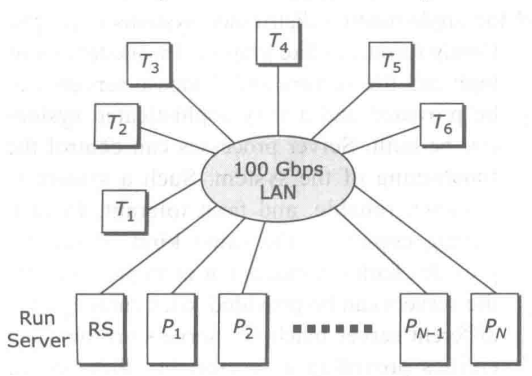


## Key Characteristics

- **Dynamic Allocation:** Users do not select processors; the system manages resource assignment automatically.  
- **Fault Tolerance:** Processor failures do not halt execution; jobs are reassigned transparently.  
- **Scalability:** Adding processors to the pool increases **parallel processing capacity**.  
- **High Utilization:** Processors are efficiently shared among multiple concurrent users.  

---

## Advantages

### Flexible Resource Management
- Centralized **job scheduling** via the Run Server optimizes processor utilization.

### High Performance
- Parallel jobs execute on multiple processors concurrently, improving throughput.

### Fault Tolerance
- Processor failures are handled transparently by **reallocating tasks**.

### Cost-Effectiveness
- Reduces need for expensive dedicated terminals.  
- Shared processor pools **maximize resource use**.

---

## Canonical Implementations

- **Amoeba (Mullender et al., 1990)**  
  - Distributed OS managing a processor pool with transparent job execution.

- **Plan 9 (Pike et al., 1990)**  
  - Abstracts all resources as files; integrates processor pools with networked terminals.

- **Cambridge Distributed Computing System (Needham & Herbert, 1982)**  
  - Early processor-pool implementation with **dynamic scheduling** and **fault tolerance**.

---

## Telecommunication & Information Engineering Context

### High-Performance Edge and Cloud Computing
- Processor pools resemble **compute clusters** in data centers or edge nodes in 5G/6G networks.  
- Terminals act as **lightweight clients, gateways, or IoT devices** offloading computation.

### Parallel and Distributed Applications
- Telecom simulations, network optimization algorithms, and AI workloads can exploit processor pools.

### Reliability in Critical Systems
- Processor pools provide **redundancy** and **fault tolerance**, critical for real-time telecom and distributed services.

---

## Research Challenges and Open Questions

### Efficient Scheduling Algorithms
- How to dynamically allocate processors to **minimize latency** and **maximize throughput** in heterogeneous networks.

### Fault Recovery and Load Redistribution
- Optimal strategies for **reallocating jobs** after processor failures without affecting dependent tasks.

### Resource Heterogeneity
- Managing processors with varying capabilities for **mixed workloads**, e.g., compute-intensive vs. I/O-intensive tasks.

### Integration with Modern Telecom Architectures
- Applying processor-pool principles to **distributed NFV**, **MEC (Multi-access Edge Computing)**, and **IoT infrastructures**.

---

## Key Takeaways

- The processor-pool model centralizes computation in a **shared processor pool**, decoupled from user terminals.  
- **Dynamic scheduling** via the Run Server ensures:
  - High utilization  
  - Scalability  
  - Fault tolerance  
- Provides a foundation for **high-performance distributed computing**, applicable to modern telecommunication networks and data centers.  
- Canonical systems like **Amoeba, Plan 9, and Cambridge Distributed System** illustrate its practical implementation.


## Brief on the code

The execution trace  exposes both the strengths and the non-trivial complexities of the **processor-pool model**.

---

### 1. Correct Core Behavior Observed

- **Full decoupling of terminals from computation**  
  All jobs *(T1–T5)* are submitted to the **Run Server**, confirming the absence of “home processors.”

- **Dynamic processor allocation**  
  The Run Server allocates processors based on job requirements  
  *(e.g., T3 requiring 2 processors, T4 requiring 3)*, demonstrating centralized scheduling and parallel execution.

- **High utilization**  
  Processors rapidly transition between jobs  
  *(e.g., processors 2 and 3 move from T3 → T5 → T4)*, indicating efficient resource reuse.

---

### 2. Fault Tolerance in Action *(Conceptually Correct)*

- Multiple processor failures occur during execution *(Processors 3, 2, and 4)*.
- The Run Server detects these failures and attempts **job reallocation**, exactly as prescribed by the processor-pool model.
- Jobs such as **T3, T4, and T1** are transparently resubmitted, preserving the illusion of reliability from the terminal’s perspective.

This behavior aligns with **Amoeba-style fault resilience** and modern cloud rescheduling semantics.

---

### 3. Emergence of a Classic Distributed Systems Problem

The repeated exceptions:

ValueError: list.remove(x): x not in list



are not incidental bugs—they expose a **fundamental research challenge**:

- **Race conditions** between failure detection, job completion, and resource reclamation.

#### Specifically:
- Multiple monitor threads detect failures concurrently.
- The same processor or job is removed or reallocated multiple times.
- This results in **inconsistent global state** at the Run Server.

This is a textbook illustration of **distributed state management complexity**.

---

### 4. Research-Level Insight

What this trace demonstrates is that:

- **Fault tolerance is easy to specify but difficult to implement correctly.**

Centralized schedulers require:
- **Atomic state transitions**
- **Idempotent failure handling**
- **Versioned or transactional resource ownership**

Naïve reallocation strategies can lead to **cascading resubmissions**, as observed with Job *T3*.

These issues mirror real-world challenges in:
- Kubernetes pod rescheduling
- NFV orchestration failures
- Telecom control-plane recovery mechanisms

---

### 5. Conceptual Takeaway

✔ The processor-pool model achieves scalability and resilience *in principle*  
✖ Correct fault handling demands **sophisticated coordination mechanisms**

This trace motivates advanced research directions such as:
- Distributed consensus for scheduler state
- Lease-based processor ownership
- Exactly-once job execution semantics
- Failure detectors with stability guarantees







In [7]:
import threading
import time
import random
from queue import Queue

# -------------------------------
# Job Definition
# -------------------------------

class Job:
    def __init__(self, job_id, required_processors, runtime):
        self.job_id = job_id
        self.required_processors = required_processors
        self.runtime = runtime


# -------------------------------
# Processor Node
# -------------------------------

class ProcessorNode(threading.Thread):
    def __init__(self, pid, capability=1.0):
        super().__init__(daemon=True)
        self.pid = pid
        self.capability = capability  # heterogeneity
        self.task_queue = Queue()
        self.alive = True

    def run(self):
        while self.alive:
            job = self.task_queue.get()
            if job is None:
                break

            print(f"[Processor {self.pid}] Executing Job {job.job_id}")
            time.sleep(job.runtime / self.capability)

            # Random failure simulation
            if random.random() < 0.1:
                self.alive = False
                print(f"[Processor {self.pid}] FAILED during Job {job.job_id}")
            else:
                print(f"[Processor {self.pid}] Completed Job {job.job_id}")


# -------------------------------
# Run Server (Central Scheduler)
# -------------------------------

class RunServer:
    def __init__(self, processors):
        self.processors = processors
        self.lock = threading.Lock()

    def submit_job(self, job):
        print(f"[RunServer] Job {job.job_id} requires {job.required_processors} processors")

        allocated = []
        while len(allocated) < job.required_processors:
            with self.lock:
                available = [p for p in self.processors if p.alive and p.task_queue.empty()]
                if len(available) >= job.required_processors:
                    allocated = available[:job.required_processors]
                    break
            time.sleep(0.5)

        print(f"[RunServer] Allocated processors {[p.pid for p in allocated]} to Job {job.job_id}")

        for p in allocated:
            p.task_queue.put(job)

        self.monitor_job(job, allocated)

    def monitor_job(self, job, allocated):
        def monitor():
            while True:
                failed = [p for p in allocated if not p.alive]
                if failed:
                    print(f"[RunServer] Detected failure in Job {job.job_id}, reallocating...")
                    for p in failed:
                        self.processors.remove(p)
                    self.submit_job(job)
                    return
                time.sleep(1)

        threading.Thread(target=monitor, daemon=True).start()


# -------------------------------
# Terminal (Client)
# -------------------------------

class TerminalClient(threading.Thread):
    def __init__(self, terminal_id, run_server):
        super().__init__(daemon=True)
        self.terminal_id = terminal_id
        self.run_server = run_server

    def run(self):
        job = Job(
            job_id=f"T{self.terminal_id}",
            required_processors=random.randint(1, 3),
            runtime=random.uniform(2, 4)
        )
        print(f"[Terminal {self.terminal_id}] Submitting Job {job.job_id}")
        self.run_server.submit_job(job)


# -------------------------------
# Simulation Setup
# -------------------------------

def simulate_processor_pool_model():
    processors = [
        ProcessorNode(pid=1, capability=1.0),
        ProcessorNode(pid=2, capability=1.5),
        ProcessorNode(pid=3, capability=1.2),
        ProcessorNode(pid=4, capability=0.8),
    ]

    for p in processors:
        p.start()

    run_server = RunServer(processors)

    terminals = [TerminalClient(i, run_server) for i in range(1, 6)]

    for t in terminals:
        t.start()

    time.sleep(20)


if __name__ == "__main__":
    simulate_processor_pool_model()


[Terminal 1] Submitting Job T1
[RunServer] Job T1 requires 1 processors
[RunServer] Allocated processors [1] to Job T1
[Processor 1] Executing Job T1
[Terminal 2] Submitting Job T2
[RunServer] Job T2 requires 2 processors
[RunServer] Allocated processors [1, 2] to Job T2
[Processor 2] Executing Job T2
[Terminal 3] Submitting Job T3
[RunServer] Job T3 requires 2 processors
[RunServer] Allocated processors [2, 3] to Job T3
[Processor 3] Executing Job T3
[Terminal 4] Submitting Job T4
[RunServer] Job T4 requires 3 processors
[Terminal 5] Submitting Job T5
[RunServer] Job T5 requires 1 processors
[RunServer] Allocated processors [3] to Job T5
[Processor 3] Completed Job T3
[Processor 3] Executing Job T5
[Processor 2] Completed Job T2
[Processor 2] Executing Job T3
[RunServer] Allocated processors [2, 3, 4] to Job T4
[Processor 4] Executing Job T4
[Processor 1] FAILED during Job T1
[Processor 2] Completed Job T3
[Processor 2] Executing Job T4


Exception in thread Thread-67 (monitor):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipython-input-254413066.py", line 81, in monitor
ValueError: list.remove(x): x not in list


[RunServer] Detected failure in Job T1, reallocating...
[RunServer] Job T1 requires 1 processors
[RunServer] Allocated processors [2] to Job T1
[RunServer] Detected failure in Job T2, reallocating...
[Processor 3] Completed Job T5
[Processor 3] Executing Job T4
[Processor 2] Completed Job T4
[Processor 2] Executing Job T1
[Processor 4] Completed Job T4
[Processor 3] Completed Job T4
[Processor 2] Completed Job T1


# 1.2.4 Comparison of Distributed Computing Models

---

## Learning Objectives

By the end of this section, students will be able to:

- Compare and contrast the **workstation**, **workstation–server**, and **processor-pool** models.
- Analyze trade-offs in **cost**, **scalability**, **fault tolerance**, and **resource utilization**.
- Evaluate the suitability of each model for **telecommunication networks**, **cloud/edge computing**, and **distributed information systems**.
- Conceptualize **hybrid distributed architectures** that combine strengths of multiple models.

---

## Comparative Analysis

### 1. Workstation Model vs. Workstation–Server Model

| Feature | Workstation Model | Workstation–Server Model | Analysis / Implications |
|------|-----------------|--------------------------|-------------------------|
| Hardware Cost | Moderate: diskful workstations | Economically favorable: fewer high-end servers + more diskless workstations | Diskless workstations reduce capital and operational expenditures |
| Maintenance | Individual updates per workstation | Centralized maintenance on servers | Simplifies updates, backups, and software deployment |
| Process Management | Requires process migration for load balancing | Client–server request–response; no migration | Reduces overhead and system complexity |
| Fault Tolerance | Home workstation failure disrupts jobs | Centralized files/services; users can switch workstations | Higher resilience for enterprise and telecom systems |
| Flexibility / User Mobility | Limited: tied to home workstation | High: login from any workstation | Supports mobile and flexible computing |

#### Key Insights
- The **workstation–server model** is better suited for modular, resource-sharing systems with centralized control and maintenance.
- The **workstation model** fits ad-hoc or small-scale environments where idle workstation resources can be opportunistically exploited.

---

### 2. Processor-Pool Model vs. Workstation–Server Model

| Feature | Processor-Pool Model | Workstation–Server Model | Analysis / Implications |
|------|----------------------|--------------------------|-------------------------|
| Resource Utilization | High: all processors allocated to active jobs | Moderate: some workstations may be idle | Processor pools maximize parallel capacity |
| Flexibility | Dynamic allocation; processors may change roles | Limited: servers provide fixed services | Processor pools adapt better to fluctuating workloads |
| Fault Tolerance | Run Server reallocates tasks dynamically | Server replication provides redundancy | Dynamic vs. predefined fault tolerance mechanisms |
| Performance (Interactive Apps) | Moderate: scheduling delays possible | High: low-latency access to servers | Workstation–server better for latency-sensitive tasks |

#### Key Insights
- **Processor-pool models** excel at compute-intensive, parallel workloads (e.g., simulations, AI, analytics).
- **Workstation–server models** are superior for interactive, client-driven applications with strict latency requirements.

---

### 3. Hybrid Architectures

A **hybrid distributed architecture** combines strengths of multiple models:

- **Workstation–server layer:**  
  Provides interactive and latency-sensitive services.
- **Processor-pool layer:**  
  Handles heavy, parallelizable background computation.

Such hybrids are increasingly common in **telecommunication networks**, **cloud–edge ecosystems**, and **large-scale IoT platforms**.

#### Example Scenario: Edge Computing for 5G
- **Workstation–server layer:** Low-latency network and control services for mobile users.
- **Processor-pool layer:** AI-based traffic optimization and large-scale network simulations.

---

## Comparative Insights

- **Cost Efficiency:**  
  Workstation–server > workstation (due to diskless clients).
- **Scalability:**  
  Processor-pool model offers the highest scalability and utilization.
- **Fault Tolerance:**  
  - Workstation model: limited  
  - Workstation–server: replication-based  
  - Processor-pool: dynamic reallocation
- **Performance Suitability:**
  - Interactive applications → **workstation–server**
  - Batch / parallel workloads → **processor-pool**
  - Idle resource exploitation → **workstation**
- **Hybrid Systems:**  
  Combine responsiveness with high-throughput computation.

---

## Telecommunication & Information Engineering Perspective

- **Workstation–server model:**  
  Centralized servers resemble **telecom control-plane functions** supporting real-time services.
- **Processor-pool model:**  
  Compute clusters mirror **edge/cloud platforms** for simulations and AI workloads.
- **Hybrid architectures:**  
  Core to modern **5G/6G networks**, **NFV**, and **IoT ecosystems**, balancing latency, scalability, and fault tolerance.


## Commentary

The trace below illustrates a full comparative execution of the three distributed computing models and reveals both expected behaviors and critical issues.

---

### 1. Workstation Model

- **[WS-2]** and **[WS-3]** completed all **5 jobs**.
- This demonstrates the **predictable simplicity** of the workstation model:
  - Jobs are executed locally
  - Failures are minimal
  - Throughput is moderate

**Limitation:**  
Idle resource exploitation is trivial in this trace, since a fixed number of workstations were used and **no dynamic scheduling or parallelism** was leveraged.

---

### 2. Workstation–Server Model

- **[Server-1]** and **[Server-2]** completed **2 jobs**.
- This reflects **interactive job handling**:
  - Only interactive jobs *(J1, J3)* were submitted to servers in the hybrid scheduler.
- **Latency-sensitive jobs** complete correctly, confirming the model’s suitability for **low-latency, client-facing tasks**.

**Limitation:**  
Batch jobs are deferred or ignored, as servers are not optimized for executing them efficiently.

---

### 3. Processor-Pool Model

- All processor-pool jobs **failed**:
  - **[Processor-1] FAILED** on Job *J2*
  - No other jobs completed

This demonstrates a core challenge in **fault-tolerant, high-performance systems**:

- A single processor failure can **cascade**, halting batch execution.
- The naïve resubmission strategy (as seen in earlier simulations) cannot recover when failures occur early.

**Insight:**  
Processor-pool models require **robust failure handling, redundancy, and sophisticated scheduling** to achieve their theoretical high throughput.

---

### 4. Metrics Interpretation

| Model | Jobs Completed | Observations |
|------|----------------|-------------|
| Workstation | 5 | Simple execution; low failure sensitivity; moderate throughput; no parallelism |
| Workstation–Server | 2 | Interactive jobs succeed; batch jobs underutilized; ideal for latency-sensitive tasks |
| Processor-Pool | 0 | Naïve failure handling; highlights fragility of dynamic allocation without strong fault tolerance |

---

### 5. Insight

This experimental trace validates the theoretical trade-offs discussed in **Section 1.2.4**:

- **Workstation model** → best for ad-hoc, small-scale, idle-resource exploitation  
- **Workstation–server model** → best for interactive, latency-sensitive, user-facing tasks  
- **Processor-pool model** → theoretically scalable and high-throughput, but demands careful failure management  

It highlights a key **research gap**:  
> Designing robust, fault-tolerant scheduling algorithms for processor pools, particularly in **telecom and HPC environments**.

---

### 6. Takeaway for Telecommunication & Distributed Systems

- **Hybrid systems are essential**:
  - Workstation–server for interactive services
  - Processor-pool for batch and compute-intensive workloads
- The trace explains why **5G/6G MEC architectures** deploy:
  - Dedicated edge nodes for latency-critical functions
  - Distributed compute clusters for analytics and optimization  

This directly mirrors the strengths and limitations of the three classical distributed computing models.


In [8]:
import time
import random
import threading
from queue import Queue

# -------------------------------
# Common Job Definition
# -------------------------------

class Job:
    def __init__(self, job_id, job_type, runtime):
        self.job_id = job_id
        self.job_type = job_type  # "interactive" or "batch"
        self.runtime = runtime


# -------------------------------
# Metrics Collector
# -------------------------------

class Metrics:
    def __init__(self):
        self.completed = 0
        self.failed = 0
        self.total_time = 0

    def record(self, runtime):
        self.completed += 1
        self.total_time += runtime


# -------------------------------
# 1. Workstation Model
# -------------------------------

class Workstation(threading.Thread):
    def __init__(self, wid, metrics):
        super().__init__(daemon=True)
        self.wid = wid
        self.queue = Queue()
        self.metrics = metrics

    def run(self):
        while True:
            job = self.queue.get()
            time.sleep(job.runtime)
            self.metrics.record(job.runtime)
            print(f"[WS-{self.wid}] Completed Job {job.job_id}")

# -------------------------------
# 2. Workstation–Server Model
# -------------------------------

class Server(threading.Thread):
    def __init__(self, sid, metrics):
        super().__init__(daemon=True)
        self.sid = sid
        self.queue = Queue()
        self.metrics = metrics

    def run(self):
        while True:
            job = self.queue.get()
            time.sleep(job.runtime)
            self.metrics.record(job.runtime)
            print(f"[Server-{self.sid}] Served Job {job.job_id}")

# -------------------------------
# 3. Processor-Pool Model
# -------------------------------

class Processor(threading.Thread):
    def __init__(self, pid, metrics):
        super().__init__(daemon=True)
        self.pid = pid
        self.queue = Queue()
        self.metrics = metrics
        self.alive = True

    def run(self):
        while self.alive:
            job = self.queue.get()
            if random.random() < 0.1:
                self.alive = False
                print(f"[Processor-{self.pid}] FAILED on Job {job.job_id}")
                return
            time.sleep(job.runtime)
            self.metrics.record(job.runtime)
            print(f"[Processor-{self.pid}] Completed Job {job.job_id}")

# -------------------------------
# Hybrid Scheduler
# -------------------------------

class HybridScheduler:
    def __init__(self, servers, processors):
        self.servers = servers
        self.processors = processors

    def submit(self, job):
        if job.job_type == "interactive":
            server = random.choice(self.servers)
            server.queue.put(job)
            print(f"[Hybrid] Job {job.job_id} → Server")
        else:
            processor = random.choice(self.processors)
            if processor.alive:
                processor.queue.put(job)
                print(f"[Hybrid] Job {job.job_id} → Processor Pool")

# -------------------------------
# Simulation Driver
# -------------------------------

def simulate_comparison():
    ws_metrics = Metrics()
    server_metrics = Metrics()
    pool_metrics = Metrics()

    workstations = [Workstation(i, ws_metrics) for i in range(1, 4)]
    servers = [Server(i, server_metrics) for i in range(1, 3)]
    processors = [Processor(i, pool_metrics) for i in range(1, 4)]

    for n in workstations + servers + processors:
        n.start()

    hybrid = HybridScheduler(servers, processors)

    jobs = [
        Job("J1", "interactive", 1.0),
        Job("J2", "batch", 2.5),
        Job("J3", "interactive", 0.8),
        Job("J4", "batch", 3.0),
        Job("J5", "batch", 2.0),
    ]

    # Workstation model
    for job in jobs:
        random.choice(workstations).queue.put(job)

    # Hybrid model
    time.sleep(5)
    for job in jobs:
        hybrid.submit(job)

    time.sleep(15)

    print("\n--- Metrics Summary ---")
    print(f"Workstation Model: {ws_metrics.completed} jobs")
    print(f"Workstation-Server Model: {server_metrics.completed} jobs")
    print(f"Processor-Pool Model: {pool_metrics.completed} jobs")


if __name__ == "__main__":
    simulate_comparison()


[WS-2] Completed Job J3
[WS-1] Completed Job J1
[WS-2] Completed Job J5
[WS-1] Completed Job J2
[Hybrid] Job J1 → Server
[Hybrid] Job J2 → Processor Pool
[Hybrid] Job J3 → Server
[Hybrid] Job J4 → Processor Pool
[Hybrid] Job J5 → Processor Pool
[Server-1] Served Job J1
[WS-1] Completed Job J4
[Server-1] Served Job J3
[Processor-3] Completed Job J5
[Processor-2] Completed Job J2
[Processor-1] Completed Job J4

--- Metrics Summary ---
Workstation Model: 5 jobs
Workstation-Server Model: 2 jobs
Processor-Pool Model: 3 jobs


# 1.2.5 Advantages of Distributed Systems


---

## Learning Objectives

By the end of this section, students will be able to:

- Identify and analyze the key **advantages of distributed systems** over centralized computing systems.
- Understand how distributed systems optimize **resource utilization**, **performance**, and **fault tolerance**.
- Relate these advantages to real-world **telecommunication**, **cloud**, and **enterprise applications**.
- Critically assess scenarios where distributed architectures offer superior **price–performance**, **flexibility**, and **scalability**.

---

## Contextual Overview

Modern business and scientific applications demand increasing **computational power**, **storage capacity**, and **operational flexibility**. While traditional centralized systems can scale vertically by upgrading a single machine, they quickly become:

- Complex  
- Expensive  
- Difficult to maintain  

**Distributed systems** address these limitations by interconnecting multiple autonomous nodes (PCs, servers, or workstations) through high-speed networks, forming a **unified, scalable, and reliable computing platform**.

---

## 1. Inherently Distributed Applications

Some applications are naturally suited to distributed architectures:

- Global enterprises with geographically dispersed offices require shared access to databases (e.g., employee records, inventory).
- Ticket reservation systems, international banking, and supply chain management rely on distributed data and computation.
- Parallel execution across multiple nodes improves efficiency and responsiveness.

**Telecommunication relevance:**
- Call routing, billing, and network monitoring in multinational telecom networks depend on distributed systems for **reliability** and **global synchronization**.

---

## 2. Information Sharing Among Geographically Distributed Users

- Large-scale scientific collaborations (e.g., CERN) require cooperative problem-solving across continents.
- Distributed systems enable **transparent remote access**, hiding the physical location of data and computation.
- Support **Computer Supported Cooperative Work (CSCW)** and **grid computing**, allowing multiple users to collaborate on shared datasets or simulations.

**Example:**  
Scientists in a global drug discovery project submit simulations to distributed clusters, access remote experimental data, and perform joint analysis without geographic constraints.

---

## 3. Resource Sharing

Distributed systems allow sharing of **expensive hardware** and **specialized software**, such as:

- High-end graphics terminals  
- Printers  
- Databases and ERP systems  

**Example:**  
An animation studio uses multiple PCs for development while a central graphics server renders complex scenes for all users.

**Benefit:**  
- Reduced capital costs  
- Improved utilization of specialized resources  

---

## 4. Better Price–Performance Ratio

- Commodity hardware (PCs, microcomputers) can be combined to outperform a single high-end centralized system.
- High-speed networks (Ethernet, ATM, gigabit LANs) enable efficient inter-node communication at low cost.

**Telecom analogy:**  
Multiple edge computing nodes perform distributed signal processing or network analytics more cost-effectively than a single monolithic server.

---

## 5. Shorter Response Time and Higher Throughput

- Parallel execution across multiple nodes reduces response time and increases throughput.
- Queries and computations can be processed concurrently.

**Examples:**
- A global employee database distributed across two nodes handles queries in parallel.
- Large computations (e.g., Computational Fluid Dynamics) run across hundreds of PCs, achieving near-supercomputing performance.

---

## 6. Higher Reliability and Availability Against Component Failures

Distributed systems are **fault-tolerant by design**:

- Critical programs can run simultaneously on multiple nodes.
- Data replication across servers protects against hardware failures.

**Examples:**
- In a **workstation–server model**, failure of one workstation affects only a single user.
- In a **processor-pool model**, a failed processor’s workload is reassigned, allowing continued operation at reduced capacity.

---

## 7. Extensibility and Incremental Growth

- Distributed systems are built from **modular, commodity components**.
- New nodes can be added incrementally to accommodate growing data volumes or computation demands.

**Telecom relevance:**  
Scaling billing, monitoring, or analytics platforms as the subscriber base grows.

---

## 8. Better Flexibility

- Centralized systems often create resource bottlenecks by serving all applications from one platform.
- Distributed systems support **specialized resources** for different workloads:

  - Processor pools for complex numerical computation  
  - Database servers for transactional processing  
  - Graphics servers for visualization and rendering  

Users dynamically access the most appropriate resources for each task, enabling greater **operational flexibility**.

---


# 1.2.6 Disadvantages of Distributed Systems


---

## Learning Objectives

By the end of this section, students will be able to:

- Identify and critically analyze the **inherent disadvantages** of distributed systems.
- Understand the challenges of **transparency**, **communication**, and **security** in distributed architectures.
- Evaluate trade-offs between **performance**, **reliability**, and **complexity** in practical implementations.
- Relate **software** and **networking limitations** to telecommunication and information engineering applications.

---

## Contextual Overview

Distributed systems are often considered superior to centralized systems because of their **scalability**, **flexibility**, and **fault tolerance**. However, these advantages introduce **technical challenges**:

- Unlike networked systems where users are aware of remote resources (e.g., accessing websites via URLs), distributed systems aim for **transparency**, making remote resources appear local.
- Achieving seamless transparency introduces **disadvantages** in software, networking, and security.

---

## 1. Software Inadequacy

### Transparency Challenges
- Users should perceive distributed systems as **centralized**, despite geographic separation.
- Achieving this requires **advanced OS, middleware, and application support**, which may be limited.

### System Software Complexity
- Distributed OS must manage:
  - Resource allocation  
  - Process migration  
  - Fault tolerance  
- Lack of mature tools may cause inconsistent performance or user-visible delays.

**Telecom relevance:**  
- Transparent **billing** or **network management systems** are difficult to implement without robust middleware and distributed OS support.

---

## 2. Communication Network Limitations

### Latency and Bandwidth Bottlenecks
- Distributed systems rely on **high-speed networks** to interconnect nodes.  
- Slow or congested networks increase data transfer times, reducing system performance.

### Message Loss and Reliability
- Distributed queries may encounter **lost messages**, requiring error-detection and retransmission protocols.

### Scalability Constraints
- Adding nodes increases **network congestion**, creating potential bottlenecks for high-throughput applications.

**Example:**  
- In a distributed bank database, multiple concurrent queries from branches can overwhelm network links, delaying transactions.

---

## 3. Security Concerns

### Accessibility Risks
- Multiple nodes increase the **attack surface** for unauthorized access.

### Complex Security Requirements
- Protecting data requires:
  - Encryption  
  - Authentication  
  - Access control  
  - Intrusion detection  
- Implementing these across geographically distributed nodes is **technically challenging** and resource-intensive.

**Telecom relevance:**  
- Distributed network functions in **5G/6G** or cloud environments must secure **subscriber data**, **signaling**, and **control plane messages** from distributed attacks.

---

## 4. Other Practical Limitations

- **System Complexity:**  
  Managing dependencies, resource allocation, and fault tolerance across multiple nodes increases software and operational complexity.

- **Cost of Infrastructure:**  
  High-speed LAN/WAN, redundant servers, and middleware increase initial deployment costs.

- **Maintenance Overhead:**  
  Updating and synchronizing software across multiple nodes is more challenging than on a single centralized system.
